# Proyecto BEDU: Airline Passenger Satisfaction

## Objetivos: 
* Analizar la calidad de servicio de una aereolinea.
* Predecir la satisfaccion de los clientes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Informacion General de Nuestro DataSet

In [2]:
data = pd.read_csv("airline_passenger_satisfaction.csv", index_col=0)

data.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [4]:
data.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
data.columns

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [6]:
data.shape

(129880, 23)

## Limpieza de Nuestros Datos

### Casting

In [7]:
data.columns

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [8]:
data.dtypes

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

In [9]:
new_data_types = {
    'Gender': 'string',
    'customer_type': 'string',
    'type_of_travel': 'string',
    'customer_class': 'string',
    'satisfaction': 'string'
}
airline_satisfaction = data.astype(new_data_types)
airline_satisfaction.dtypes

Gender                                string
customer_type                         string
age                                    int64
type_of_travel                        string
customer_class                        string
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

### Valores NA

In [10]:
airline_satisfaction.isna().any()

Gender                               False
customer_type                        False
age                                  False
type_of_travel                       False
customer_class                       False
flight_distance                      False
inflight_wifi_service                False
departure_arrival_time_convenient    False
ease_of_online_booking               False
gate_location                        False
food_and_drink                       False
online_boarding                      False
seat_comfort                         False
inflight_entertainment               False
onboard_service                      False
leg_room_service                     False
baggage_handling                     False
checkin_service                      False
inflight_service                     False
cleanliness                          False
departure_delay_in_minutes           False
arrival_delay_in_minutes              True
satisfaction                         False
dtype: bool

In [11]:
# Encontramos el total de NAs en la columan "arrival_delay_in_minutes"
na_values = airline_satisfaction["arrival_delay_in_minutes"].isna().sum()
na_values

393

In [12]:
# Create a new data frame and fill with cero
prom = airline_satisfaction['arrival_delay_in_minutes'].mean()
airline_satisfaction = airline_satisfaction.fillna(prom)
prom

15.09112883918849

In [13]:
airline_satisfaction.isna().any()

Gender                               False
customer_type                        False
age                                  False
type_of_travel                       False
customer_class                       False
flight_distance                      False
inflight_wifi_service                False
departure_arrival_time_convenient    False
ease_of_online_booking               False
gate_location                        False
food_and_drink                       False
online_boarding                      False
seat_comfort                         False
inflight_entertainment               False
onboard_service                      False
leg_room_service                     False
baggage_handling                     False
checkin_service                      False
inflight_service                     False
cleanliness                          False
departure_delay_in_minutes           False
arrival_delay_in_minutes             False
satisfaction                         False
dtype: bool

### Convertir columna "satisfaction" en numerica

In [14]:
airline_satisfaction.satisfaction.unique()

<StringArray>
['neutral or dissatisfied', 'satisfied']
Length: 2, dtype: string

In [15]:
airline_satisfaction.satisfaction = [1 if v == 'neutral or dissatisfied' else 0 for v in airline_satisfaction.satisfaction]

In [16]:
airline_satisfaction.satisfaction.unique()

array([1, 0], dtype=int64)

In [17]:
airline_satisfaction['satisfaction'].head()

0    1
1    1
2    0
3    1
4    0
Name: satisfaction, dtype: int64

## Analisis de los Servicios

In [18]:
num_col = []
cat_col = []

for col in airline_satisfaction.columns:
    
    if col in ['satisfaction']:
        continue
    
    if airline_satisfaction[col].dtype in ['int64', 'float64']:
        num_col.append(col)
    else: 
        cat_col.append(col)

num_col, cat_col

(['age',
  'flight_distance',
  'inflight_wifi_service',
  'departure_arrival_time_convenient',
  'ease_of_online_booking',
  'gate_location',
  'food_and_drink',
  'online_boarding',
  'seat_comfort',
  'inflight_entertainment',
  'onboard_service',
  'leg_room_service',
  'baggage_handling',
  'checkin_service',
  'inflight_service',
  'cleanliness',
  'departure_delay_in_minutes',
  'arrival_delay_in_minutes'],
 ['Gender', 'customer_type', 'type_of_travel', 'customer_class'])

In [19]:
print('Columnas Categoricas')
print('-'*20)
i = 1
for col in airline_satisfaction[cat_col]:
    print(i)
    print(f'{col}: {airline_satisfaction[col].unique()} - {len(airline_satisfaction[col].unique())}pcs')
    i += 1

Columnas Categoricas
--------------------
1
Gender: <StringArray>
['Male', 'Female']
Length: 2, dtype: string - 2pcs
2
customer_type: <StringArray>
['Loyal Customer', 'disloyal Customer']
Length: 2, dtype: string - 2pcs
3
type_of_travel: <StringArray>
['Personal Travel', 'Business travel']
Length: 2, dtype: string - 2pcs
4
customer_class: <StringArray>
['Eco Plus', 'Business', 'Eco']
Length: 3, dtype: string - 3pcs


In [20]:
print('Columnas Numericas')

#for col in airline_satisfaction[num_col]:
    #print(f'{col}: {airline_satisfaction[col].unique()} - {len(airline_satisfaction[col].unique())}pcs')
airline_satisfaction[num_col].head()

Columnas Numericas


,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


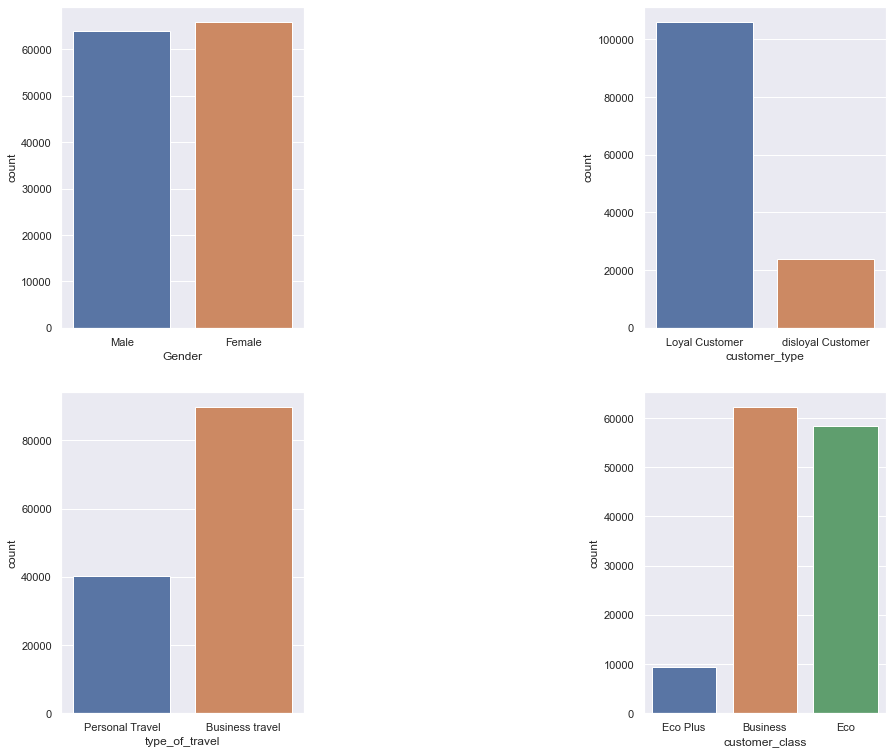

In [21]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 13))

#plt.subplot(2,4,1)
#ax = sns.countplot(data = airline_satisfaction, x = 'Gender');
#plt.subplot(2,4,3)
#ax2 = sns.countplot(data = airline_satisfaction, x = 'customer_type');
#plt.subplot(2,4,5)
#ax2 = sns.countplot(data = airline_satisfaction, x = 'type_of_travel');
#plt.subplot(2,4,7)
#ax2 = sns.countplot(data = airline_satisfaction, x = 'customer_class');
i = 1
for col in airline_satisfaction[cat_col]:
    plt.subplot(2,4,i)
    ax = sns.countplot(data = airline_satisfaction, x = col);
    i += 2

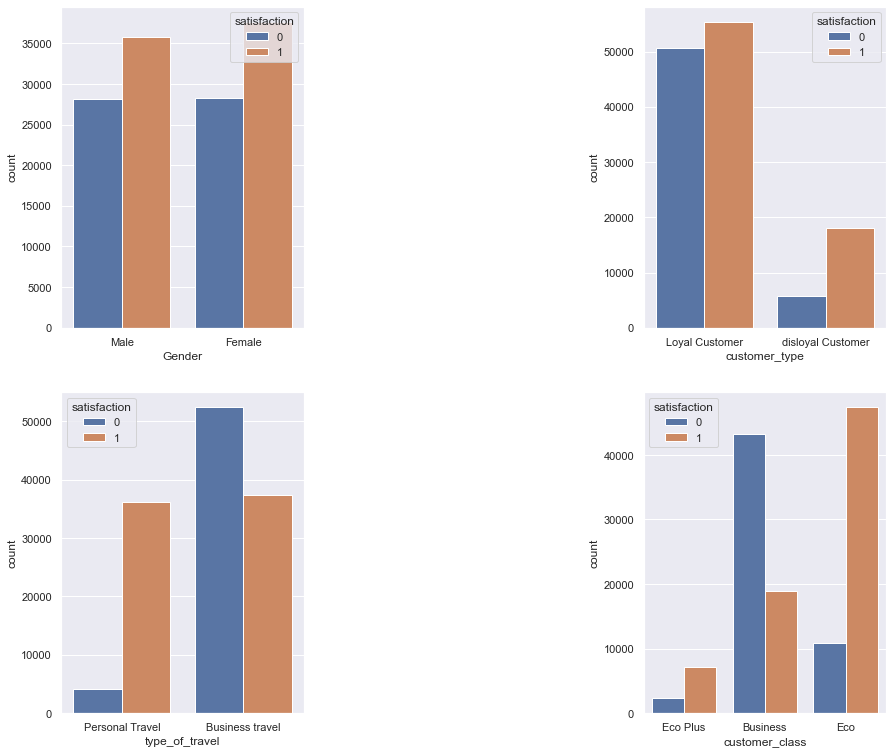

In [22]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 13))

#plt.subplot(2,4,1)
#ax = sns.countplot(data = airline_satisfaction, x = 'Gender', hue='satisfaction');
#plt.subplot(2,4,3)
#ax2 = sns.countplot(data = airline_satisfaction, x = 'customer_type', hue='satisfaction');
#plt.subplot(2,4,5)
#ax2 = sns.countplot(data = airline_satisfaction, x = 'type_of_travel', hue='satisfaction');
#plt.subplot(2,4,7)
#ax2 = sns.countplot(data = airline_satisfaction, x = 'customer_class', hue='satisfaction');

# 1 insatisfecho y 0 satisfecho

i = 1
for col in airline_satisfaction[cat_col]:
    plt.subplot(2,4,i)
    ax = sns.countplot(data = airline_satisfaction, x = col, hue='satisfaction');
    i += 2

### Observaciones de las categorias

- Hay mas mujeres que hombres en los datos, y son las mujeres quienes estan mas insatisfechas de los servicios que los hombres.
- Los pasajeros leales consideran buenos los servicos de la aereolinea a diferencia de aquellos pasajeros que no son leales.
- Aquellos pasajeros que viajan por motivos personales quedan mas instisfechos de los servicios de la aerelinea que aquellos
que van por un viaje de negocio
- Tanto los pasajeros de la clase economica como de la clase economica plus son los mas insatisfechos de los servicios de la aereolina mientras que los que viajan en la clase negocios estan satisfechos de los servicios. 

C:\Users\CesarHz\Documents\my_JN_Projects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


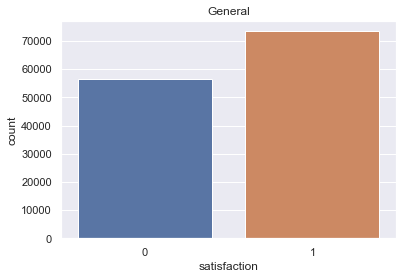

In [23]:
# Resumen 
sns.countplot(airline_satisfaction.satisfaction)
plt.title("General");

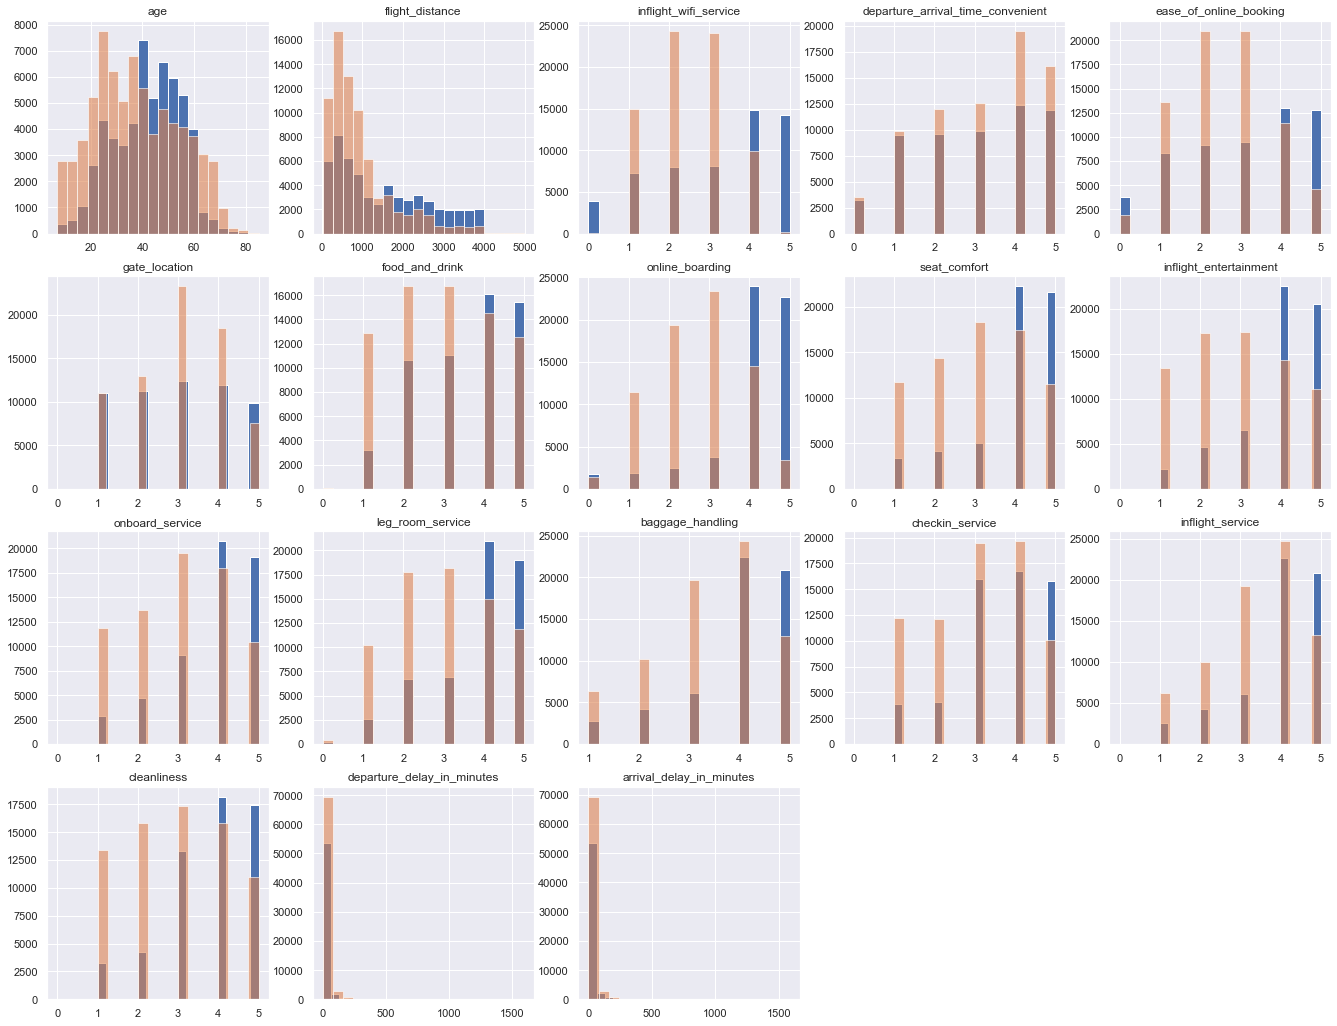

In [24]:
plt.figure(figsize=(23, 18))

for i, col in enumerate(num_col):
    if col != ['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']:
        plt.subplot(4, 5, i+1)
        airline_satisfaction[col][airline_satisfaction.satisfaction == 0].hist(bins=20)
        airline_satisfaction[col][airline_satisfaction.satisfaction == 1].hist(bins=20, alpha = 0.6)
        plt.title(f'{col}')

### Observaciones de los servicios

- Los pasajeros mayores consideran que los servicios son buenos a diferencia de los pasajeros menores que piensan lo contrario.
- Mientras mas corta sea el viaje, los pasajeros quedan insatisfechos por los servicio mientras que los viajes largos son los 
que tienen mejor satisfaccion.

#### Mejoras en los servicios
- Servicio de WIFI
- Calidad de la comida y bebidas en el avion
- Reservacion en linea
- Limpieza

#### Buena calidad del servicio
- Entretenimiento dentro del avion
- Espacio de piernas


## Checkpoint Modulo 4

### Analisis de Nuestras Variables

#### Variables Numericas con BoxPlot

Promedio de Edades:
39
Minimo y maximo de Edades:
7 85
Desviacion Estandar:
15.11935995037178


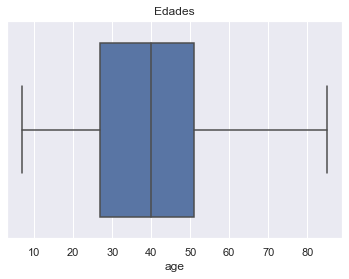

In [25]:
print("Promedio de Edades:")
print(int(airline_satisfaction['age'].mean()))
print("Minimo y maximo de Edades:")
print(airline_satisfaction['age'].min(), airline_satisfaction['age'].max())
print("Desviacion Estandar:")
print(airline_satisfaction['age'].std())

ax = sns.boxplot(x = airline_satisfaction['age'])
ax.set(title="Edades");

Promedio de Distancia de Vuelo:
1190
Minimo y maximo de Distancia de Vuelo:
31 4983
Desviacion Estandar:
997.4524773267232


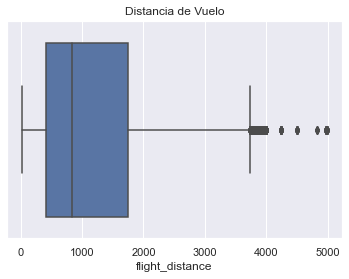

In [26]:
print("Promedio de Distancia de Vuelo:")
print(int(airline_satisfaction['flight_distance'].mean()))
print("Minimo y maximo de Distancia de Vuelo:")
print(airline_satisfaction['flight_distance'].min(), airline_satisfaction['flight_distance'].max())
print("Desviacion Estandar:")
print(airline_satisfaction['flight_distance'].std())

ax = sns.boxplot(x = airline_satisfaction['flight_distance'])
ax.set(title="Distancia de Vuelo");

Promedio de retraso:
14
Minimo y maximo de minutos de retraso:
0 1592
Desviacion Estandar:
38.07112621501346


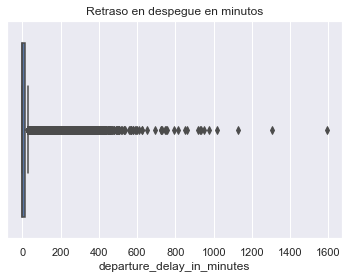

In [27]:
print("Promedio de retraso:")
print(int(airline_satisfaction['departure_delay_in_minutes'].mean()))

print("Minimo y maximo de minutos de retraso:")
print(airline_satisfaction['departure_delay_in_minutes'].min(), airline_satisfaction['departure_delay_in_minutes'].max())

print("Desviacion Estandar:")
print(airline_satisfaction['departure_delay_in_minutes'].std())

ax = sns.boxplot(x = airline_satisfaction['departure_delay_in_minutes'])
ax.set(title="Retraso en despegue en minutos");

In [28]:
iqr = airline_satisfaction['departure_delay_in_minutes'].quantile(0.75) - airline_satisfaction['departure_delay_in_minutes'].quantile(0.25)
    
filtro_inferior = airline_satisfaction['departure_delay_in_minutes'] > airline_satisfaction['departure_delay_in_minutes'].quantile(0.25) - (iqr * 1.5)

filtro_superior = airline_satisfaction['departure_delay_in_minutes'] < airline_satisfaction['departure_delay_in_minutes'].quantile(0.75) + (iqr * 1.5)

df_filtrado = airline_satisfaction[filtro_inferior & filtro_superior]

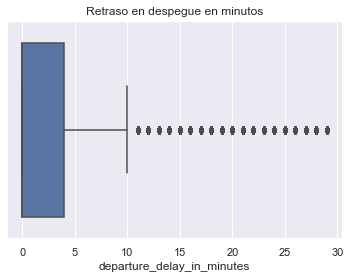

In [29]:
ax = sns.boxplot(x = df_filtrado['departure_delay_in_minutes'])
ax.set(title="Retraso en despegue en minutos");

Promedio de retraso:
15
Minimo y maximo de minutos de retraso:
0 1584
Desviacion Estandar:
38.407409672056424


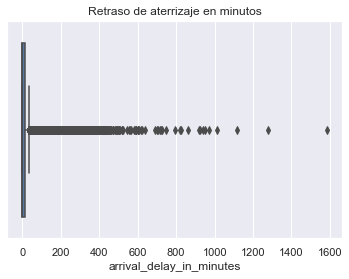

In [30]:
print("Promedio de retraso:")
print(int(airline_satisfaction['arrival_delay_in_minutes'].mean()))

print("Minimo y maximo de minutos de retraso:")
print(int(airline_satisfaction['arrival_delay_in_minutes'].min()), int(airline_satisfaction['arrival_delay_in_minutes'].max()))

print("Desviacion Estandar:")
print(airline_satisfaction['arrival_delay_in_minutes'].std())

ax = sns.boxplot(x = airline_satisfaction['arrival_delay_in_minutes'])
ax.set(title="Retraso de aterrizaje en minutos");

In [31]:
iqr = airline_satisfaction['arrival_delay_in_minutes'].quantile(0.75) - airline_satisfaction['arrival_delay_in_minutes'].quantile(0.25)
    
filtro_inferior = airline_satisfaction['arrival_delay_in_minutes'] > airline_satisfaction['arrival_delay_in_minutes'].quantile(0.25) - (iqr * 1.5)

filtro_superior = airline_satisfaction['arrival_delay_in_minutes'] < airline_satisfaction['arrival_delay_in_minutes'].quantile(0.75) + (iqr * 1.5)

df_filtrado2 = airline_satisfaction[filtro_inferior & filtro_superior]

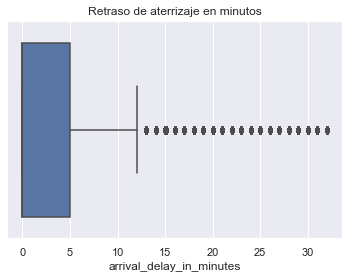

In [32]:
ax = sns.boxplot(x = df_filtrado2['arrival_delay_in_minutes'])
ax.set(title="Retraso de aterrizaje en minutos");

#### Variables Categoricas con Tablas de Contigencia

In [33]:
crosstab = pd.crosstab(airline_satisfaction['Gender'], airline_satisfaction['inflight_wifi_service'])

crosstab

inflight_wifi_service,0,1,2,3,4,5
Gender,,,,,,
Female,2000,11353,16546,16326,12484,7190
Male,1916,10975,15774,15859,12291,7166


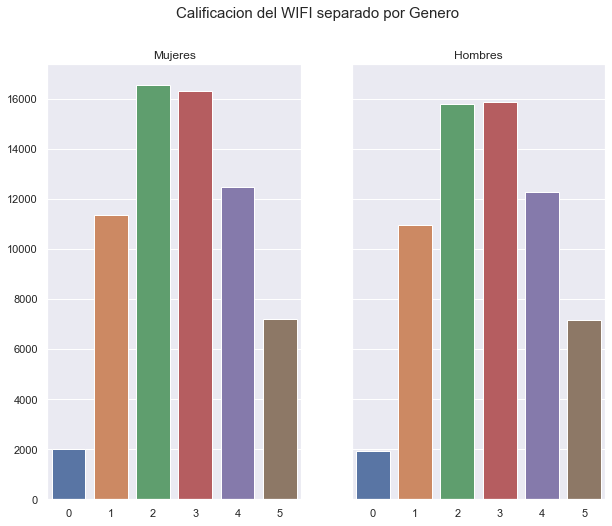

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x = crosstab.columns, y = crosstab.iloc[0], ax=axes[0])
sns.barplot(x = crosstab.columns, y = crosstab.iloc[1], ax=axes[1])

axes[0].set(xlabel='', ylabel='', title='Mujeres')
axes[1].set(xlabel='', ylabel='', title='Hombres')

fig.suptitle('Calificacion del WIFI separado por Genero', fontsize=15);

In [35]:
crosstab2 = pd.crosstab(airline_satisfaction['Gender'], airline_satisfaction['leg_room_service'])

crosstab2

leg_room_service,0,1,2,3,4,5
Gender,,,,,,
Female,518,6691,12747,12839,18056,15048
Male,80,6204,11793,12217,17830,15857


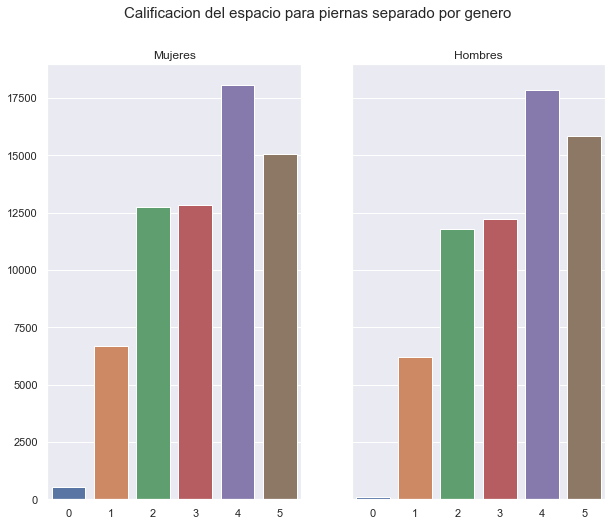

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x = crosstab2.columns, y = crosstab2.iloc[0], ax=axes[0])
sns.barplot(x = crosstab2.columns, y = crosstab2.iloc[1], ax=axes[1])

axes[0].set(xlabel='', ylabel='', title='Mujeres')
axes[1].set(xlabel='', ylabel='', title='Hombres')

fig.suptitle('Calificacion del espacio para piernas separado por genero', fontsize=15);

In [37]:
crosstab3 = pd.crosstab(airline_satisfaction['customer_class'], airline_satisfaction['inflight_wifi_service'])

crosstab3

inflight_wifi_service,0,1,2,3,4,5
customer_class,,,,,,
Business,2490,11299,13831,13618,11874,9048
Eco,1169,9572,16070,16131,11025,4342
Eco Plus,257,1457,2419,2436,1876,966


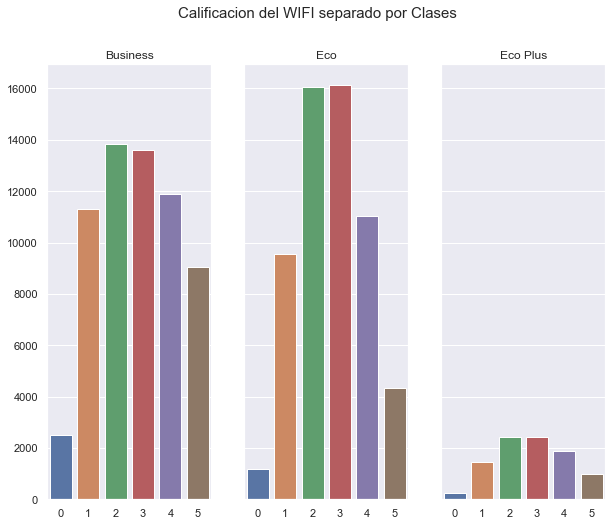

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x = crosstab3.columns, y = crosstab3.iloc[0], ax=axes[0])
sns.barplot(x = crosstab3.columns, y = crosstab3.iloc[1], ax=axes[1])
sns.barplot(x = crosstab3.columns, y = crosstab3.iloc[2], ax=axes[2])

axes[0].set(xlabel='', ylabel='', title='Business')
axes[1].set(xlabel='', ylabel='', title='Eco')
axes[2].set(xlabel='', ylabel='', title='Eco Plus')

fig.suptitle('Calificacion del WIFI separado por Clases', fontsize=15);

In [39]:
crosstab4 = pd.crosstab(airline_satisfaction['customer_class'], airline_satisfaction['leg_room_service'])

crosstab4

leg_room_service,0,1,2,3,4,5
customer_class,,,,,,
Business,158,3562,9478,9777,21136,18049
Eco,386,7928,12986,13191,12751,11067
Eco Plus,54,1405,2076,2088,1999,1789


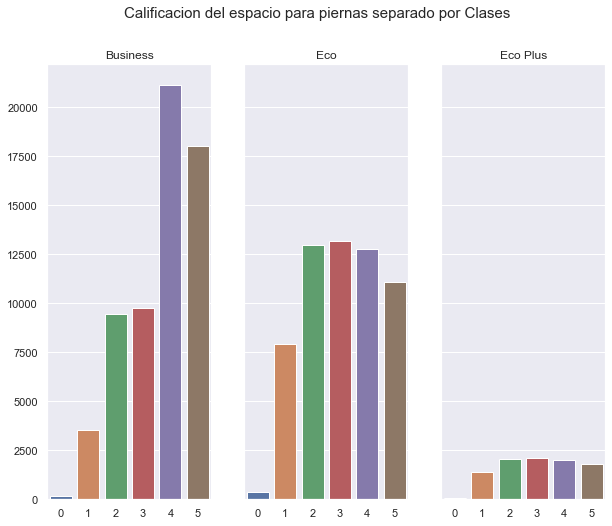

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x = crosstab4.columns, y = crosstab4.iloc[0], ax=axes[0])
sns.barplot(x = crosstab4.columns, y = crosstab4.iloc[1], ax=axes[1])
sns.barplot(x = crosstab4.columns, y = crosstab4.iloc[2], ax=axes[2])

axes[0].set(xlabel='', ylabel='', title='Business')
axes[1].set(xlabel='', ylabel='', title='Eco')
axes[2].set(xlabel='', ylabel='', title='Eco Plus')

fig.suptitle('Calificacion del espacio para piernas separado por Clases', fontsize=15);

## Modelo Regresion Logistica

In [41]:
# Convertimos nuestras variables categoricas en numericas
cat_col

['Gender', 'customer_type', 'type_of_travel', 'customer_class']

In [42]:
# Definimos "X" y "y"
X = airline_satisfaction.drop("satisfaction", axis=1)
y = airline_satisfaction["satisfaction"]

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = cat_col
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.,  1.,  1., ...,  5., 25., 18.],
       [ 0.,  1.,  0., ...,  1.,  1.,  6.],
       [ 1.,  0.,  1., ...,  5.,  0.,  0.],
       ...,
       [ 1.,  0.,  1., ...,  2.,  0.,  0.],
       [ 0.,  1.,  1., ...,  4.,  0.,  0.],
       [ 1.,  0.,  1., ...,  1.,  0.,  0.]])

In [44]:
# Ahora la variable transformer_x es nuestra "X"
# Definimos las variables de pruebas y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3)

In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [46]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
logreg.score(X_test, y_test)

0.876501385894672

## Evaluacion de nuestro modelo con matriz de confusion

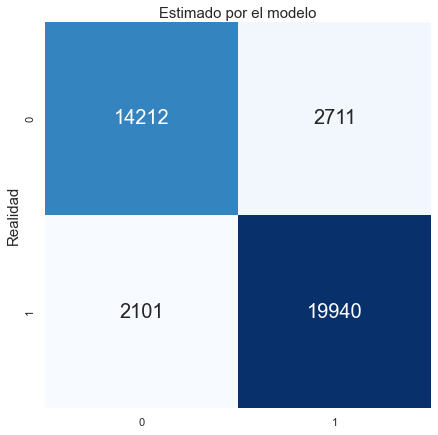

In [48]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Graficamos 
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

## Calculo de Presicion, Exactitud, Sensibilidad y Especificidad

In [49]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.8803143349079511
Exactitud: 0.876501385894672
Sensibilidad: 0.9046776462048002
Especificidad: 0.8398038172900786


## Checkpoint Modulo 5

Modelos Aplicados:

    - SVM
    
    - Random Forrest Classifier
    
    - Naive Bayes

In [66]:
# evaluacion de modelos
from sklearn.metrics import confusion_matrix

def graficar(matrix):
    # Graficamos 
    class_names=[0,1] 
    fig, ax = plt.subplots(figsize=(6, 6))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    #Heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.ylabel('Realidad', fontsize=15, y=0.5)
    plt.xlabel('Estimado por el modelo', fontsize=15);

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    # print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")
    graficar(resultado)

In [51]:
transformed_X, y

(array([[ 0.,  1.,  1., ...,  5., 25., 18.],
        [ 0.,  1.,  0., ...,  1.,  1.,  6.],
        [ 1.,  0.,  1., ...,  5.,  0.,  0.],
        ...,
        [ 1.,  0.,  1., ...,  2.,  0.,  0.],
        [ 0.,  1.,  1., ...,  4.,  0.,  0.],
        [ 1.,  0.,  1., ...,  1.,  0.,  0.]]),
 0         1
 1         1
 2         0
 3         1
 4         0
          ..
 129875    1
 129876    0
 129877    1
 129878    0
 129879    1
 Name: satisfaction, Length: 129880, dtype: int64)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
import time 

start = time.time()

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_preds_RF = clf.predict(X_test)

end = time.time()
print("time: "+str(end-start))

time: 9.89103364944458


True positives: 14398
True negatives: 10652
False positives: 659
False negative: 267
Precision:96.43517092700955%
Sensibilidad:98.17933856120014%
Especificidad:94.1738131022898%


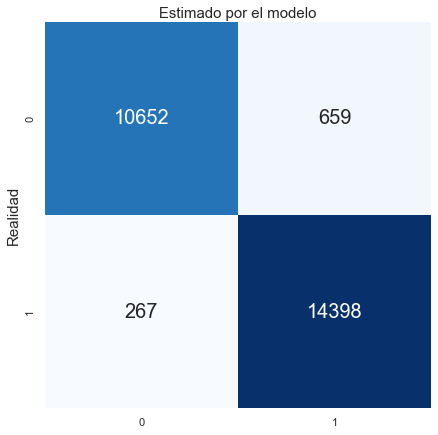

In [67]:
evaluar(y_test, y_preds_RF)

### SVM

In [69]:
from sklearn.svm import SVC
import time

start = time.time()
SupportVectorMachine = SVC()
SupportVectorMachine.fit(X_train, y_train) 
y_pred_svm = SupportVectorMachine.predict(X_test) 

end = time.time()
print("time: "+str(end-start))

time: 2038.921809911728


True positives: 12330
True negatives: 5103
False positives: 6208
False negative: 2335
Precision:67.11194949183862%
Sensibilidad:84.07773610637572%
Especificidad:45.11537441428698%


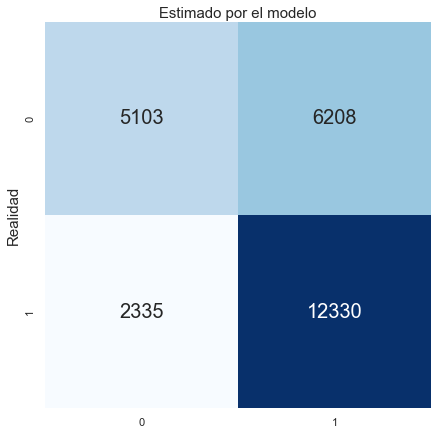

In [70]:
evaluar(y_test, y_pred_svm)

### Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
import time

start = time.time()
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) 
y_pred_nb = NaiveBayes.predict(X_test) 

end = time.time()

print("time: "+str(end-start))

time: 0.0709831714630127


True positives: 12810
True negatives: 9198
False positives: 2113
False negative: 1855
Precision:84.7243609485679%
Sensibilidad:87.3508353221957%
Especificidad:81.31906993192467%


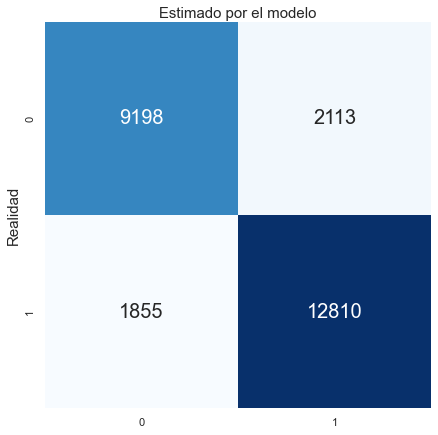

In [74]:
evaluar(y_test, y_pred_nb)